,Time,MovementTypeDesig,APARCAMIENTO
0,2025-02-01 00:01:06.260,SALIDA,SAN BERNARDO
1,2025-02-01 00:01:12.830,SALIDA,VEGUETA
2,2025-02-01 00:01:24.770,SALIDA,SANAPÚ
3,2025-02-01 00:01:27.490,SALIDA,ELDER
4,2025-02-01 00:01:45.710,SALIDA,SAN BERNARDO


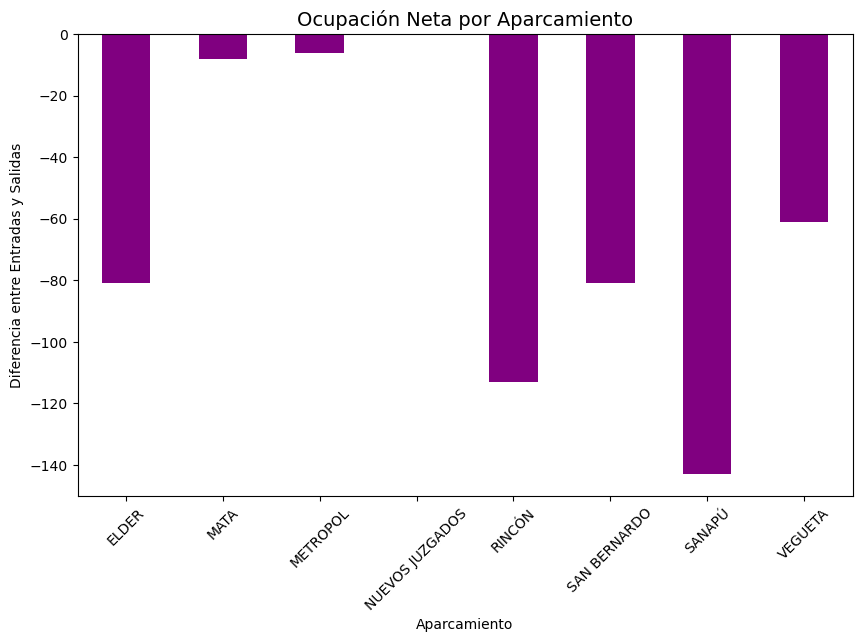

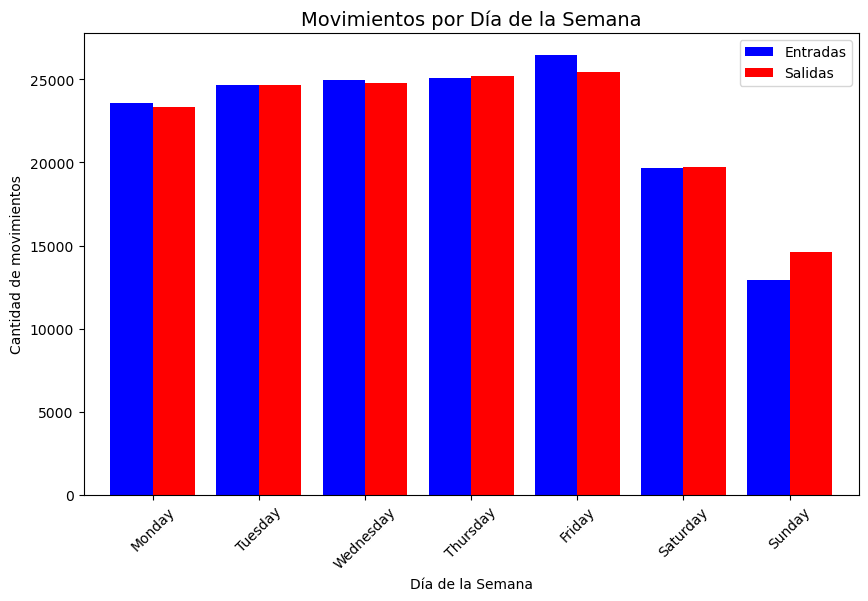

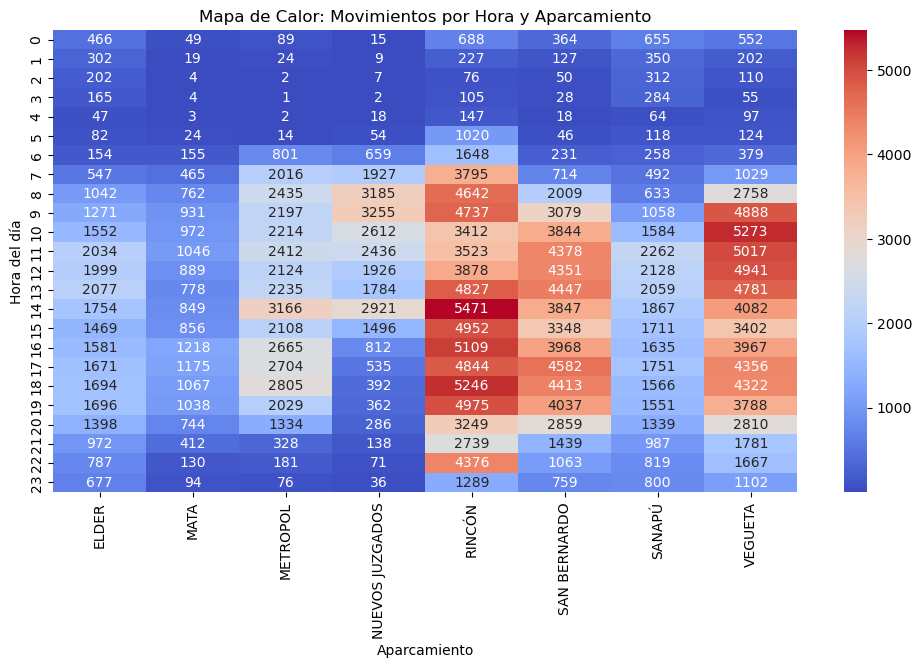

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
df = pd.read_excel("APARCAMIENTOS-FEBRERO-2025.xlsx")

# Revisar las primeras filas
display(df.head())

# Asegurar que los nombres de las columnas sean correctos
df.columns = [col.strip().upper() for col in df.columns]

# Convertir la columna de tiempo a formato datetime
df["TIME"] = pd.to_datetime(df["TIME"])

# Extraer hora y día de la semana
df["HOUR"] = df["TIME"].dt.hour
df["DAYOFWEEK"] = df["TIME"].dt.day_name()

# Contar movimientos por tipo y aparcamiento
movimientos_por_aparcamiento = df.groupby(["APARCAMIENTO", "MOVEMENTTYPEDESIG"]).size().unstack()
movimientos_por_aparcamiento.columns = ["ENTRADA", "SALIDA"]

# Calcular ocupación neta
movimientos_por_aparcamiento["OCUPACIÓN NETA"] = movimientos_por_aparcamiento["ENTRADA"] - movimientos_por_aparcamiento["SALIDA"]

# Graficar ocupación neta
fig, ax = plt.subplots(figsize=(10, 6))
movimientos_por_aparcamiento["OCUPACIÓN NETA"].plot(kind="bar", color="purple", ax=ax)
ax.set_title("Ocupación Neta por Aparcamiento", fontsize=14)
ax.set_ylabel("Diferencia entre Entradas y Salidas")
ax.set_xlabel("Aparcamiento")
plt.xticks(rotation=45)
plt.show()

# Análisis de movimientos por día de la semana
dias_orden = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
movimientos_por_dia = df.groupby(["DAYOFWEEK", "MOVEMENTTYPEDESIG"]).size().unstack()
movimientos_por_dia = movimientos_por_dia.reindex(dias_orden)

# Graficar movimientos por día de la semana
fig, ax = plt.subplots(figsize=(10, 6))
movimientos_por_dia.plot(kind="bar", ax=ax, width=0.8, color=["blue", "red"])
ax.set_title("Movimientos por Día de la Semana", fontsize=14)
ax.set_ylabel("Cantidad de movimientos")
ax.set_xlabel("Día de la Semana")
ax.legend(["Entradas", "Salidas"])
plt.xticks(rotation=45)
plt.show()

# Crear un heatmap de actividad
df_heatmap = df.pivot_table(index="HOUR", columns="APARCAMIENTO", values="MOVEMENTTYPEDESIG", aggfunc="count")

plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Mapa de Calor: Movimientos por Hora y Aparcamiento")
plt.xlabel("Aparcamiento")
plt.ylabel("Hora del día")
plt.show()
